# Graphes avec networkx

## 1 : principales méthodes pour manipuler  un graphe avec networkx 

Complétez :


  Fonction          |           Rôle
--------------------|----------------------------------------
G.add_edge(S1, S2)  |  Ajouter une arête à G entre s1 et q2
G.add_node(Noeud)   | Ajoute un noueg a G
G.remove_node(Noeud)| enlève un sommet a G
$G[Sommet]$         | Voisins de sommet dans G
G.nodes()           | Les sommets de G
nx.draw(G)          | dessine G
G.add_edges_from([(S1,S2), ... , (Sp, Sq)] | Ajoute 

In [7]:
import networkx as nx

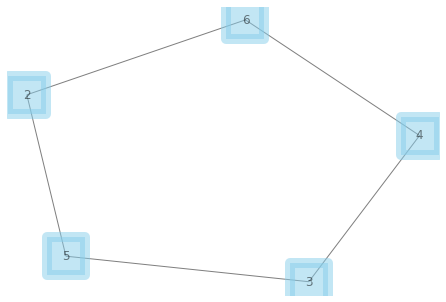

In [20]:
# Rappels dessins de Graphes
G = nx.Graph()
G.add_edges_from([(6,4),(4,3),(3,5), (5,2),(2,6)])
G.add_edge(2,5)

options = {
    'with_labels': True,
    'node_size': 1500,
    'node_color': "skyblue",
    'node_shape': "s", 
    'alpha': 0.5, 
    'linewidths': 10
}
nx.draw(G, **options)

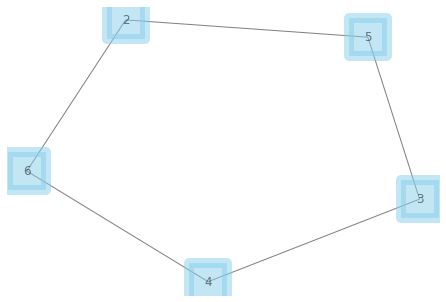

In [9]:
# En sauvegardant dans un fichier le graphe dessiné
import matplotlib.pyplot as plt
fig = plt.figure()
nx.draw(G, **options)
fig.savefig("G12.png")

## 2 Quelques fonctions sur les graphes

### 2.1	Ecrire une fonction qui prend en  entrée un  graphe  et  un sommet  et  renvoie  le degré de ce sommet

In [18]:
# Exo 2.1
def degre(G,x):
    return len(G[X])

print(degre(G,4))

In [14]:
# avec nx :

G.degree(4)

2

### 2.2 Ecrire de 3 façons une fonction qui prend en entrée un graphe et 2 sommets et renvoie vrai s’il y a une arête entre les deux.

In [31]:
# Exo 2.2
def edge_in(G,x,y):
    return G.has_edge(x, y)

print(edge_in(G,3,4))

def arete_existe(G,x,y):
    return y in G.neighbors(x)


print(arete_existe(G,3,4))

def possede_arete(G,x,y):
    if (x, y) in G.edges():
        return True
    return False
    


True
True


### 2.3	Ecrire de 2 façons une fonction qui prend en entrée un graphe et renvoie le nombre total d’arêtes dans G

In [42]:
# Exo 2.3

def nb_edges(G):
    return G.number_of_edges()

def nb_aretes(G):
    res = 0
    for i in G.nodes():
        res += len(G[i])
    return res//2

print(nb_edges(G))
print(nb_aretes(G))

5
5


### 2.4 Vérifier expérimentalement la formule qui relie les degrés des sommets et le nombre d'arêtes dans un graphe G

In [53]:
def nb_aretes(G):
    res = 0
    for i in G.nodes():
        res += len(G[i])
    return res//2
assert 2*len(G.edges) == sum(G.degree(v) for v in G.nodes)

### Quel est le noeud de degré maximal dans G ?

In [64]:
def noeud_maximal(G):
    res = 0
    max = None
    for i in G.nodes():
        if len(G[i]) > res or max is None:
            res = len(G[i])
            max = i
    return max

max(G.degree(v) for v in G.nodes)

print(noeud_maximal(G))

6


## 3. Parcours de graphes

Plusieurs applications sur les graphes nécessitent un examen exhaustif des sommets et des arrêtes du graphe. Autrement dit, nous avons besoin de parcourir  le graphe. Deux parcours classiques sont à connaître :
 
1. Parcours  en  **profondeur  (DFS =  Depth-First Search)**  :  à  partir  d’un  sommet  donné  S, suivre le chemin le plus loin possible (explorer un fils de S, le fils du fils de S, etc), puis faire des retours en arrière pour reprendre tous les chemins ignorés précédemment. Le parcours en profondeur s'écrit naturellement de manière **récursive**

2.	Parcours en **largeur (BFS - Breadth-First Search)** : à partir d’un sommet donné, explorer ses successeurs, puis les successeurs non explorés des successeurs, etc.


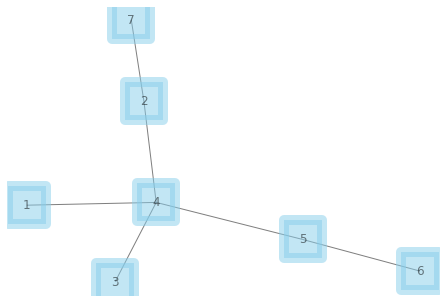

In [75]:
G1 = nx.Graph()
G1.add_edges_from([(1,4),(4,2),(4,3),(4,5),(5,6),(2,7)])
nx.draw(G1, **options)

### 3.1 Donner les parcours en profondeur et en largeur en partant du sommet 4 de G1

### 3.2 Première tentative
Quel est le problème avec la tentative suivante ?

In [66]:
# tentative de parcours 
def parcours0(graphe, depart):
    pile = [depart]
    while (len(pile)>0):
        noeud_courant = pile.pop()
        print(noeud_courant)
        for noeud in graphe[noeud_courant]:
            pile.append(noeud)

In [65]:
# Parcours infini : pas de terminaison
parcours0(G1,4)

NameError: name 'parcours0' is not defined

### 3.3 Proposez maintenant une version itérative du parcours en profondeur (DFS)

In [89]:
# iterative
def parcours(G,a):
    pile = [a]
    atteint = [a]
    while pile:
        courant = pile.pop()
        for noeuds in G[courant]:
            if noeuds not in atteint:

                pile.append(noeuds)
                atteint.append(noeuds)
    return atteint
            
        

In [88]:
parcours(G1,4)

1
2
3
5
6
7


[4, 1, 2, 3, 5, 6, 7]

### 3.4 Puis une version récursive du DFS

In [100]:
# récursive
def dfs_rec(G, depart, visités=None):
    if visités is None:
        visités = set()
    visités.add(depart)
    for noeuds in G[depart]:
        if noeuds not in visités:
            dfs_rec(G,noeuds,visités)
            
    return visités

            


In [101]:
dfs_rec(G1,4)

{1, 2, 3, 4, 5, 6, 7}

In [ ]:
def est_chemin(G, liste):
    """
    existe t-il toujours une arêtes oiyr 2 sillets consécutifs de la liste ?"""
    for i in range(len(liste)-1):
        if liste[i+1] in G[liste[i]]:
            return False
        return True